# Hex Maze Spyglass Process!
---

You can skip down a couple cells to the "fast version" that has everything in one cell. But if you're still working through things, I have it split up by cell up here.

(Note this "full process" doesn't include ephys + sorting + decoding, because those are covered in separate tutorials)

## 1: Insert the session into spyglass

In [1]:
import spyglass.common as sgc
import spyglass.position as sgp
import spyglass.data_import as sgi
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass_hexmaze.hex_maze_behavior import (
    populate_all_hexmaze,
    populate_hex_position,
)
from spyglass_hexmaze.berke_fiber_photometry import populate_all_fiber_photometry

# File name of an nwb in /stelmo/nwb/raw
# Berke lab nwbs actually live in /squall-b/nwbs, and are symlinked to stelmo
nwb_file_name = "IM-1478_20220726.nwb"

# When we run insert_session, spyglass creates a copy of the nwbfile named file name + _
# We use nwb_copy_file_name to make it explicit which one to use.
# Everything besides sgi.insert_session should use the copy file name
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

## Step 1.
# Insert session into spyglass (populates all common tables)
sgi.insert_sessions(nwb_file_name)

/home/scrater/dev/spyglass/src/spyglass/data_import/insert_sessions.py:74: UserWarning: Cannot insert data from IM-1478_20220726.nwb: IM-1478_20220726_.nwb is already in Nwbfile table.
  warnings.warn(


#### Confirm it worked!

In [2]:
from spyglass.common import Session

## Step 1 check: Confirm the nwbfile has been added to the Session table
key = {"nwb_file_name": nwb_copy_file_name}

print("Session table:")
display(Session() & key)

Session table:


nwb_file_name name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
IM-1478_20220726_.nwb,IM-1478,"University of California, San Francisco",Berke Lab,IM-1478_20220726,probability change session for the hex maze task with 3 blocks and 135 trials.,2022-07-26 13:16:59,2022-07-26 13:16:59,Hex maze task


## 2: Insert into hex maze tables

In [3]:
## Step 2.
# Once the session has been inserted, insert into basic hex maze tables
# populates HexMazeBlock, HexMazeBlock.Trial, HexMazeChoice, HexMazeTrialHistory, HexCentroids, HexMazeConfig
populate_all_hexmaze(nwb_copy_file_name)

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


#### Confirm it worked!

In [4]:
from spyglass_hexmaze.hex_maze_behavior import (
    HexMazeBlock,
    HexCentroids,
    HexMazeConfig,
    HexMazeChoice,
    HexMazeTrialHistory,
)

## Step 2 check: Confirm the nwbfile has been added to the basic hex maze tables
key = {"nwb_file_name": nwb_copy_file_name}

# Show the HexMazeBlock table
print("HexMazeBlock table:")
display(HexMazeBlock() & key)

# Show the Trial part table
print("HexMazeBlock().Trial part table:")
display(HexMazeBlock().Trial() & key)

# Show the HexMazeChoice table
print("HexMazeChoice table:")
display(HexMazeChoice() & key)

# Show the HexMazeTrialHistory table
print("HexMazeTrialHistory table:")
display(HexMazeTrialHistory() & key)

# Show the HexCentroids table (nwb_file_name is key)
print("HexCentroids table:")
display(HexCentroids() & key)

# Show the HexCentroids part table (nwb_file_name and hex)
print("HexCentroidsPart:")
display((HexCentroids().HexCentroidsPart()) & key)

# All config_ids for blocks in your session will also now exist in the HexMazeConfig table
# Show the HexMazeConfig table
print("HexMazeConfig table (not restricted by nwb_file_name, includes all sessions):")
display(HexMazeConfig())

HexMazeBlock table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,config_id maze configuration as a string,interval_list_name descriptive name of this interval list,p_a probability of reward at port A,p_b probability of reward at port B,p_c probability of reward at port C,num_trials number of trials in this block,task_type 'barrier shift' or 'probabilty shift'
IM-1478_20220726_.nwb,0,1,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change
IM-1478_20220726_.nwb,0,2,"5,15,16,18,22,29,36,44,45",epoch0_block2,50.0,90.0,10.0,61,probability change
IM-1478_20220726_.nwb,0,3,"5,15,16,18,22,29,36,44,45",epoch0_block3,10.0,50.0,90.0,12,probability change


HexMazeBlock().Trial part table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,interval_list_name descriptive name of this interval list,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
IM-1478_20220726_.nwb,0,1,1,epoch0_block1_trial1,1,0,None,B,None,=BLOB=,4.41332
IM-1478_20220726_.nwb,0,1,2,epoch0_block1_trial2,2,0,B,A,None,=BLOB=,19.7859
IM-1478_20220726_.nwb,0,1,3,epoch0_block1_trial3,3,0,A,B,None,=BLOB=,34.3184
IM-1478_20220726_.nwb,0,1,4,epoch0_block1_trial4,4,1,B,C,None,=BLOB=,31.8525
IM-1478_20220726_.nwb,0,1,5,epoch0_block1_trial5,5,0,C,B,None,=BLOB=,24.1405
IM-1478_20220726_.nwb,0,1,6,epoch0_block1_trial6,6,1,B,A,None,=BLOB=,25.1743
IM-1478_20220726_.nwb,0,1,7,epoch0_block1_trial7,7,1,A,C,None,=BLOB=,19.5397
IM-1478_20220726_.nwb,0,1,8,epoch0_block1_trial8,8,1,C,A,None,=BLOB=,18.8619
IM-1478_20220726_.nwb,0,1,9,epoch0_block1_trial9,9,0,A,B,None,=BLOB=,16.3381
IM-1478_20220726_.nwb,0,1,10,epoch0_block1_trial10,10,0,B,C,None,=BLOB=,66.7565


HexMazeChoice table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,choice_direction 'left' or 'right',reward_prob_chosen chosen reward probability,reward_prob_unchosen unchosen reward probability,reward_prob_diff p(chosen) - p(unchosen),path_length_chosen length of the chosen path,path_length_unchosen length of the unchosen path,path_length_diff chosen path length - unchosen path length
IM-1478_20220726_.nwb,0,1,2,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,3,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,4,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,5,left,10.0,90.0,-80.0,17,17,0
IM-1478_20220726_.nwb,0,1,6,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,7,left,50.0,10.0,40.0,17,15,2
IM-1478_20220726_.nwb,0,1,8,right,90.0,10.0,80.0,17,17,0
IM-1478_20220726_.nwb,0,1,9,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,10,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,11,right,90.0,10.0,80.0,17,17,0


HexMazeTrialHistory table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,port_visit_1prev_rwd if the previous visit to this port was rewarded,port_visit_2prev_rwd if the second-to-last visit to this port was rewarded,port_visit_3prev_rwd if the third-to-last visit to this port was rewarded,port_visit_1prev_same_path if the previous visit to this port was via the same path,port_visit_2prev_same_path if the second-to-last visit to this port was via the same path,port_visit_3prev_same_path if the third-to-last visit to this port was via the same path,trial_1prev_rwd if the rat got a reward on the previous trial,trial_2prev_rwd if the rat got a reward 2 trials ago,trial_3prev_rwd if the rat got a reward 3 trials ago,trial_4prev_rwd if the rat got a reward 4 trials ago,trial_5prev_rwd if the rat got a reward 5 trials ago,trials_since_port_visit number of trials since the last visit to this port,trials_since_rwd number of trials since the last reward
IM-1478_20220726_.nwb,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,2,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,3,0,0,0,0,0,0,0,0,0,0,0,2,-1
IM-1478_20220726_.nwb,0,1,4,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,5,0,0,0,0,0,0,1,0,0,0,0,2,1
IM-1478_20220726_.nwb,0,1,6,0,0,0,1,0,0,0,1,0,0,0,4,2
IM-1478_20220726_.nwb,0,1,7,1,0,0,0,0,0,1,0,1,0,0,3,1
IM-1478_20220726_.nwb,0,1,8,1,0,0,0,0,0,1,1,0,1,0,2,1
IM-1478_20220726_.nwb,0,1,9,0,0,0,0,1,0,1,1,1,0,1,4,1
IM-1478_20220726_.nwb,0,1,10,1,1,0,0,1,0,0,1,1,1,0,3,2


HexCentroids table:


nwb_file_name name of the NWB file
IM-1478_20220726_.nwb


HexCentroidsPart:


nwb_file_name name of the NWB file,hex the hex ID in the hex maze (1-49),"x_pixels the x coordinate of the hex centroid, in video pixel coordinates","y_pixels the y coordinate of the hex centroid, in video pixel coordinates","x_cm the x coordinate of the hex centroid, in cm","y_cm the y coordinate of the hex centroid, in cm"
IM-1478_20220726_.nwb,1,327.0,62.0,104.14,19.7452
IM-1478_20220726_.nwb,10,329.0,169.0,104.777,53.8217
IM-1478_20220726_.nwb,11,260.0,170.0,82.8026,54.1401
IM-1478_20220726_.nwb,12,394.0,208.0,125.478,66.242
IM-1478_20220726_.nwb,13,329.0,208.0,104.777,66.242
IM-1478_20220726_.nwb,14,261.0,207.0,83.121,65.9236
IM-1478_20220726_.nwb,15,426.0,233.0,135.669,74.2038
IM-1478_20220726_.nwb,16,360.0,226.0,114.65,71.9745
IM-1478_20220726_.nwb,17,293.0,228.0,93.3121,72.6115
IM-1478_20220726_.nwb,18,215.0,230.0,68.4713,73.2484


HexMazeConfig table (not restricted by nwb_file_name, includes all sessions):


config_id maze configuration as a string,len_ab number of hexes on optimal path between ports A and B,len_bc number of hexes on optimal path between ports B and C,len_ac number of hexes on optimal path between ports A and C,"path_length_diff max path length difference between lenAB, lenBC, lenAC",num_choice_points number of critical choice points for this maze config,num_cycles number of graph cycles (closed loops) for this maze config,choice_points list of hexes that are choice points (not query-able),num_dead_ends number of dead ends at least 3 hexes long,optimal_pct percentage of maze hexes that are on optimal paths,non_optimal_pct percentage of maze hexes that are on non-optimal paths,dead_end_pct percentage of maze hexes that are on dead-end paths
"10,11,14,19,20,26,28,31,38,40",19,15,19,4,1,0,=BLOB=,2,66.67,0.0,33.33
"10,11,14,20,26,28,31,35,38,40",19,23,15,8,1,0,=BLOB=,1,71.79,0.0,28.21
"10,11,14,20,28,31,35,36,38,40",19,23,15,8,1,0,=BLOB=,1,71.79,0.0,28.21
"10,11,15,21,22,25,27,34,37,40,44",19,17,15,4,1,0,=BLOB=,1,65.79,0.0,34.21
"10,11,15,21,25,27,29,34,37,40,44",21,23,15,8,1,0,=BLOB=,0,76.32,0.0,23.68
"10,11,15,22,25,27,30,34,37,40,44",19,21,15,6,1,0,=BLOB=,0,71.05,0.0,28.95
"10,11,19,20,26,28,31,36,38,40",19,21,19,2,1,0,=BLOB=,2,74.36,0.0,25.64
"10,12,15,21,22,27,30,39,44,47",23,17,17,6,3,2,=BLOB=,1,82.05,0.0,17.95
"10,12,15,21,24,27,30,39,44,47",15,17,21,6,3,1,=BLOB=,2,71.79,0.0,28.21
"10,12,15,21,24,27,31,39,44,47",21,17,19,4,3,1,=BLOB=,2,76.92,0.0,23.08


## 3: Process position

NOTE I have set up some sets of parameters which may or may not be what you want!!!!

`"berke_double_led"` is the same as `"default"` but with the LED order switched (unlike Frank lab, we want `led1_is_front: 0`).

`"berke_double_led_500"` is the same as above, but upsampled to 500 Hz for decoding.

Check out the [spyglass position tutorial](https://github.com/LorenFrankLab/spyglass/blob/master/notebooks/20_Position_Trodes.ipynb) for more info.

If you only track one point with DLC instead of 2, you should probably be using `single_led` parameters. But look into it!

In [5]:
## Step 3.
# Process position using some parameters
# We only have one epoch (epoch 0) for Berke lab, so "pos 0 valid times" is always the interval list name
interval_list_name = "pos 0 valid times"

# Our position selection key includes the nwbfile name, the interval to process, and the parameters to use
position_selection_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": interval_list_name,
    "trodes_pos_params_name": "berke_double_led",  # YOU MAY WANT / NEED TO CHANGE THIS
}
# To associate a set of parameters with a given interval, insert them into the `TrodesPosSelection` table
# Note "trodes position" really just means any imported unprocessed position
sgp.v1.TrodesPosSelection.insert1(position_selection_key, skip_duplicates=True)

# We can run the pipeline for our chosen interval/parameters by using the `TrodesPosV1.populate`
# Each NWB file, interval, and parameter set is now associated with a new analysis file and object ID.
sgp.v1.TrodesPosV1.populate(position_selection_key)

{'success_count': 0, 'error_list': []}

#### Confirm it worked!

In [6]:
from spyglass.position import PositionOutput

## Step 3 check: Confirm the nwbfile has been added to the PositionOutput table
key = {"nwb_file_name": nwb_copy_file_name}

# PositionOutput is a merge table with only merge_id as primary key, so we restrict by merge_get_part instead of & key
print("PositionOutput table restricted by merge_get_part(restriction=key)")
display(PositionOutput.merge_get_part(restriction=key))

# The above is equivalent to referencing the part table directly and doing & key
print(
    "PositionOutput.TrodesPosV1() part table restricted by key (should be same as above!!)"
)
display(PositionOutput().TrodesPosV1() & key)

# We can also use merge_view! This also gives us 'source'. Note that it is TrodesPosV1, the part table!
print("PositionOutput merge_view")
display(PositionOutput.merge_view(restriction=f"nwb_file_name='{nwb_copy_file_name}'"))

PositionOutput table restricted by merge_get_part(restriction=key)


merge_id,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,trodes_pos_params_name name for this set of parameters
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led_500
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led


PositionOutput.TrodesPosV1() part table restricted by key (should be same as above!!)


merge_id,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,trodes_pos_params_name name for this set of parameters
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led_500
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led


PositionOutput merge_view
*merge_id      *source        *nwb_file_name *interval_list *trodes_pos_pa
+------------+ +------------+ +------------+ +------------+ +------------+
cfe6c111-1aa1- TrodesPosV1    IM-1478_202207 pos 0 valid ti berke_double_l
d99e7241-3d87- TrodesPosV1    IM-1478_202207 pos 0 valid ti berke_double_l
 (Total: 2)



None

## 4. Assign position to hex

In [ ]:
## Step 4.
# Insert into HexPositionSelection, HexPosition, and HexPath tables
# (must have run populate_all_hexmaze (Step 2) and have an entry in the PositionOutput table (Step 3))
populate_hex_position(nwb_copy_file_name)

Populating HexPosition for 2 entries in IM-1478_20220726_.nwb


#### Confirm it worked!

HexPositionSelection table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based)
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0


HexPosition table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_assignment_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_QVH88J6G2L.nwb,6713169f-da4e-412f-93c5-e709fce6ad7f
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0,IM-1478_20220726_HQLDMS4JE5.nwb,28611906-fe95-4be1-8f60-e7d7398f917f


HexPath table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_path_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_2A2O0R9ANC.nwb,7cbed8bd-f26a-407d-a42b-08f255c9307a
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0,IM-1478_20220726_SEOYOY3FO3.nwb,543ee677-7d6b-46dc-b63b-b0b9a7c3d365


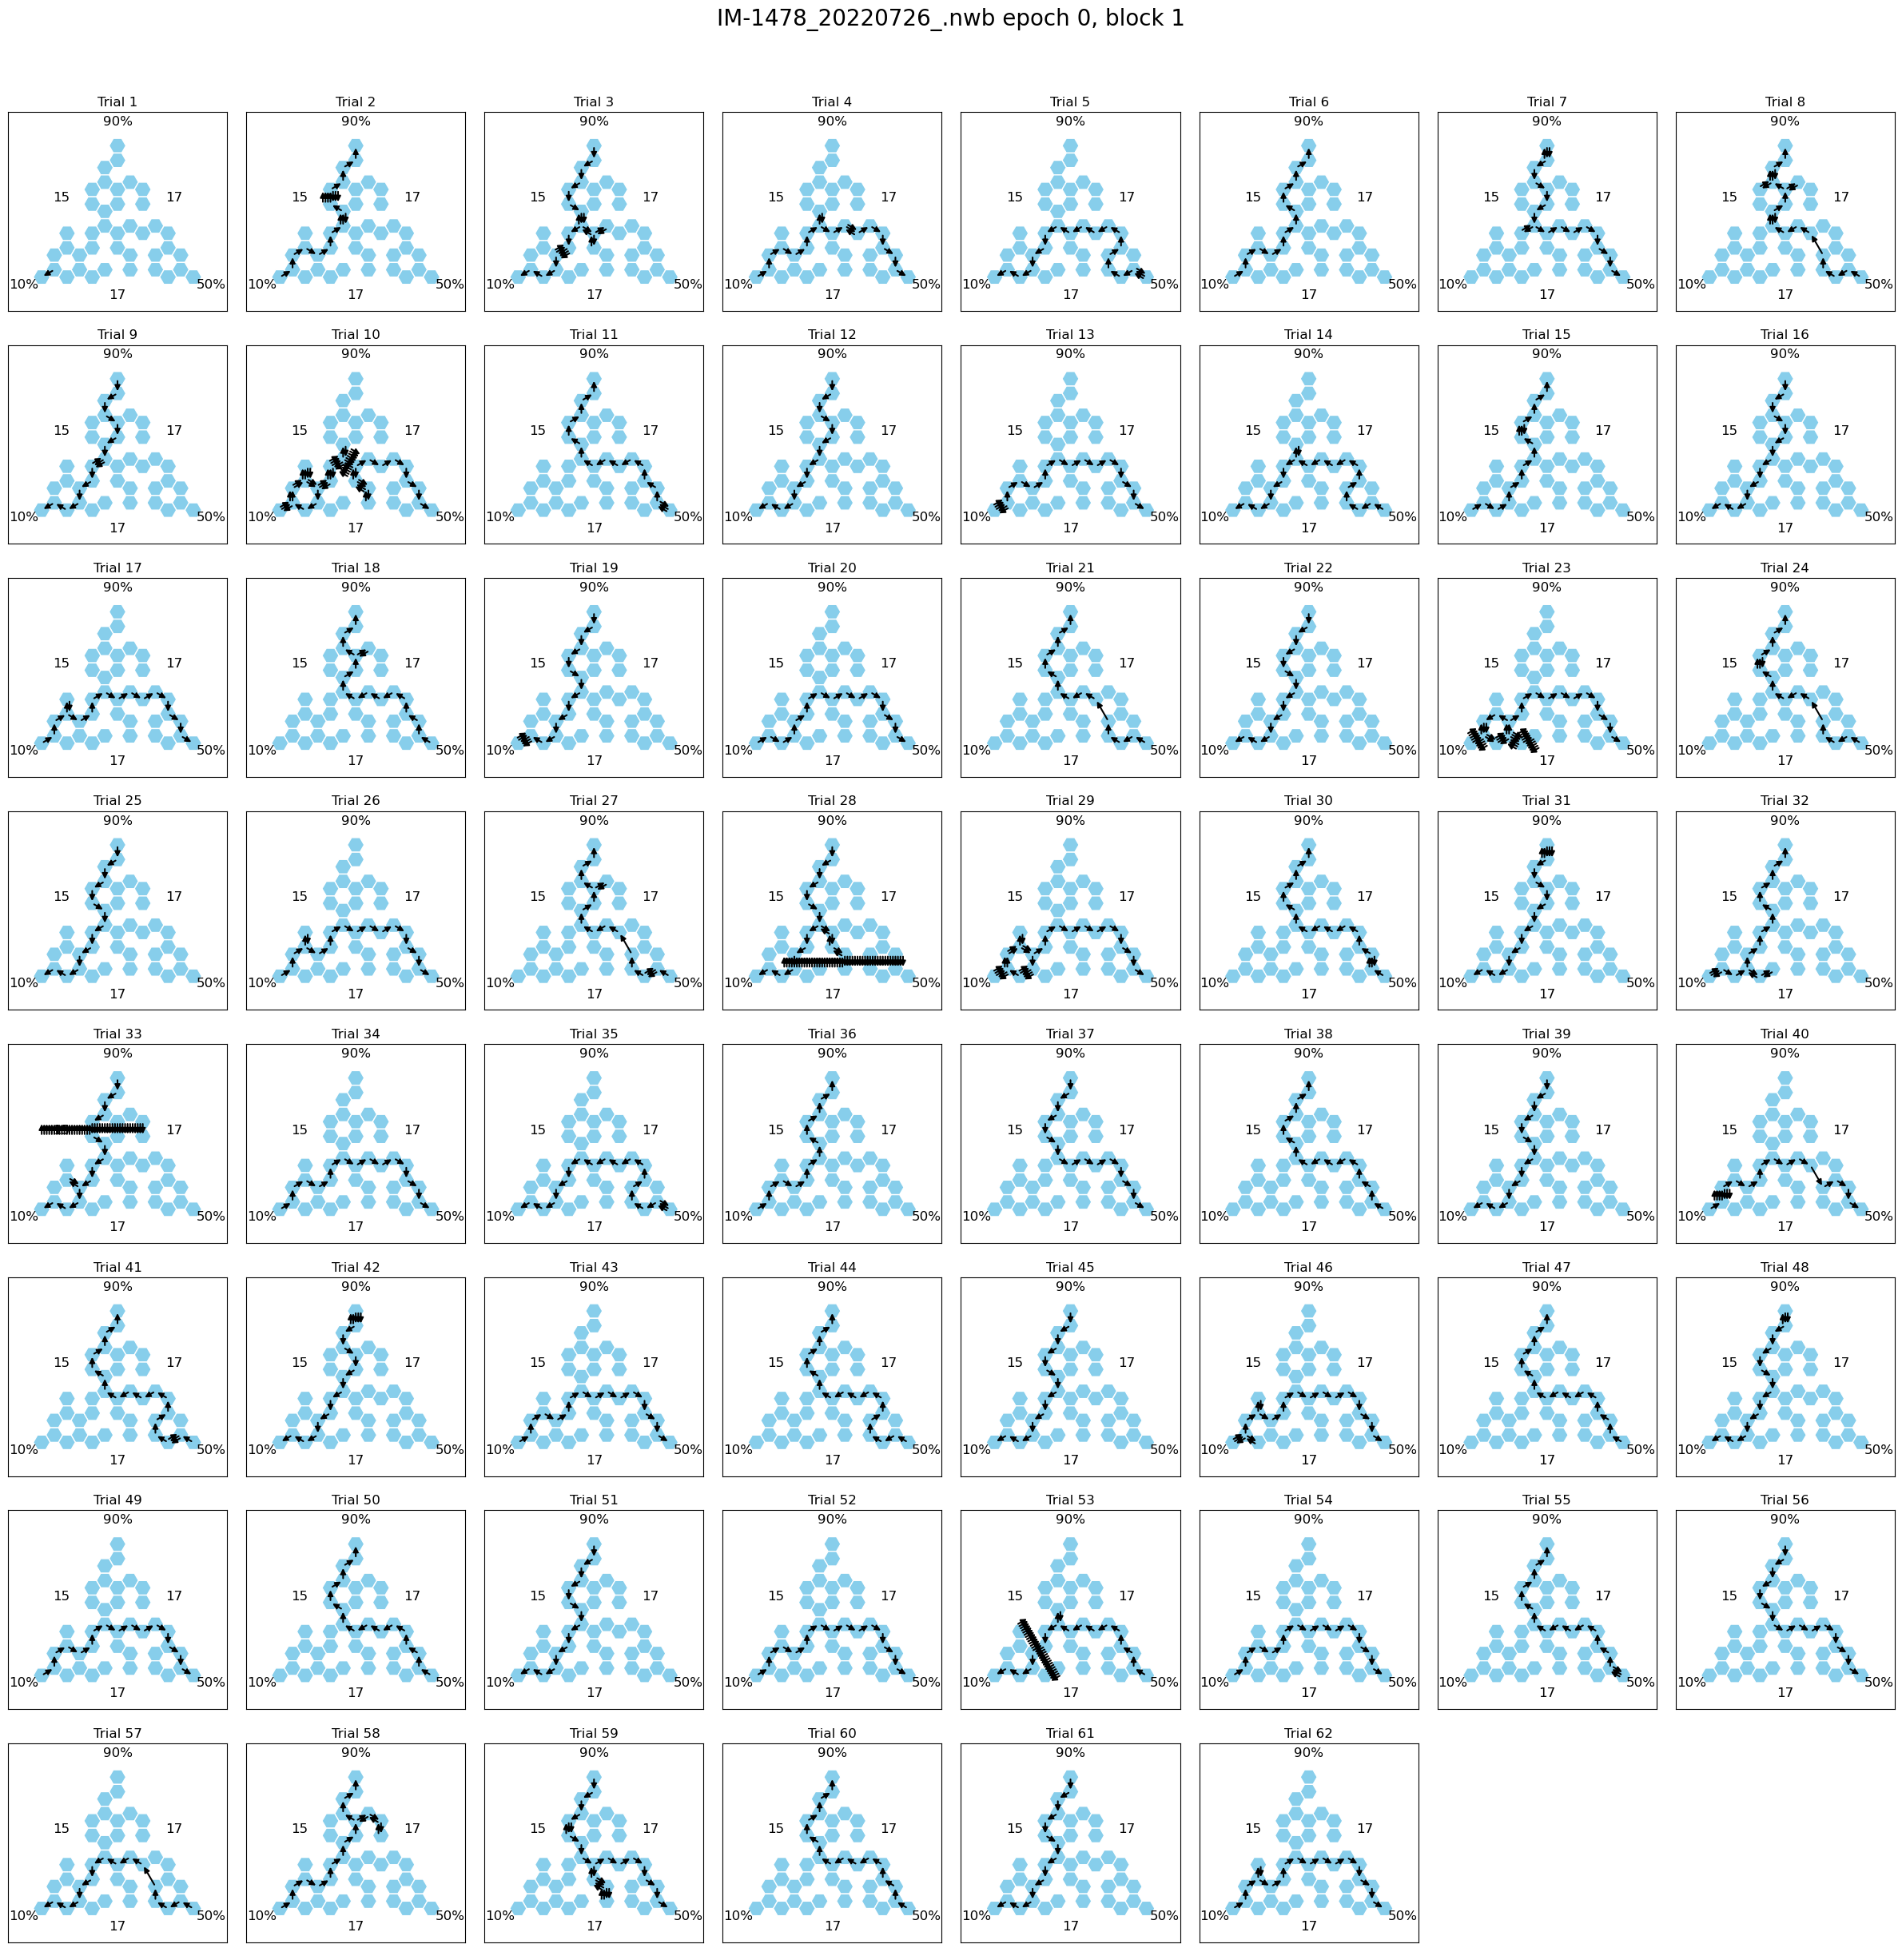

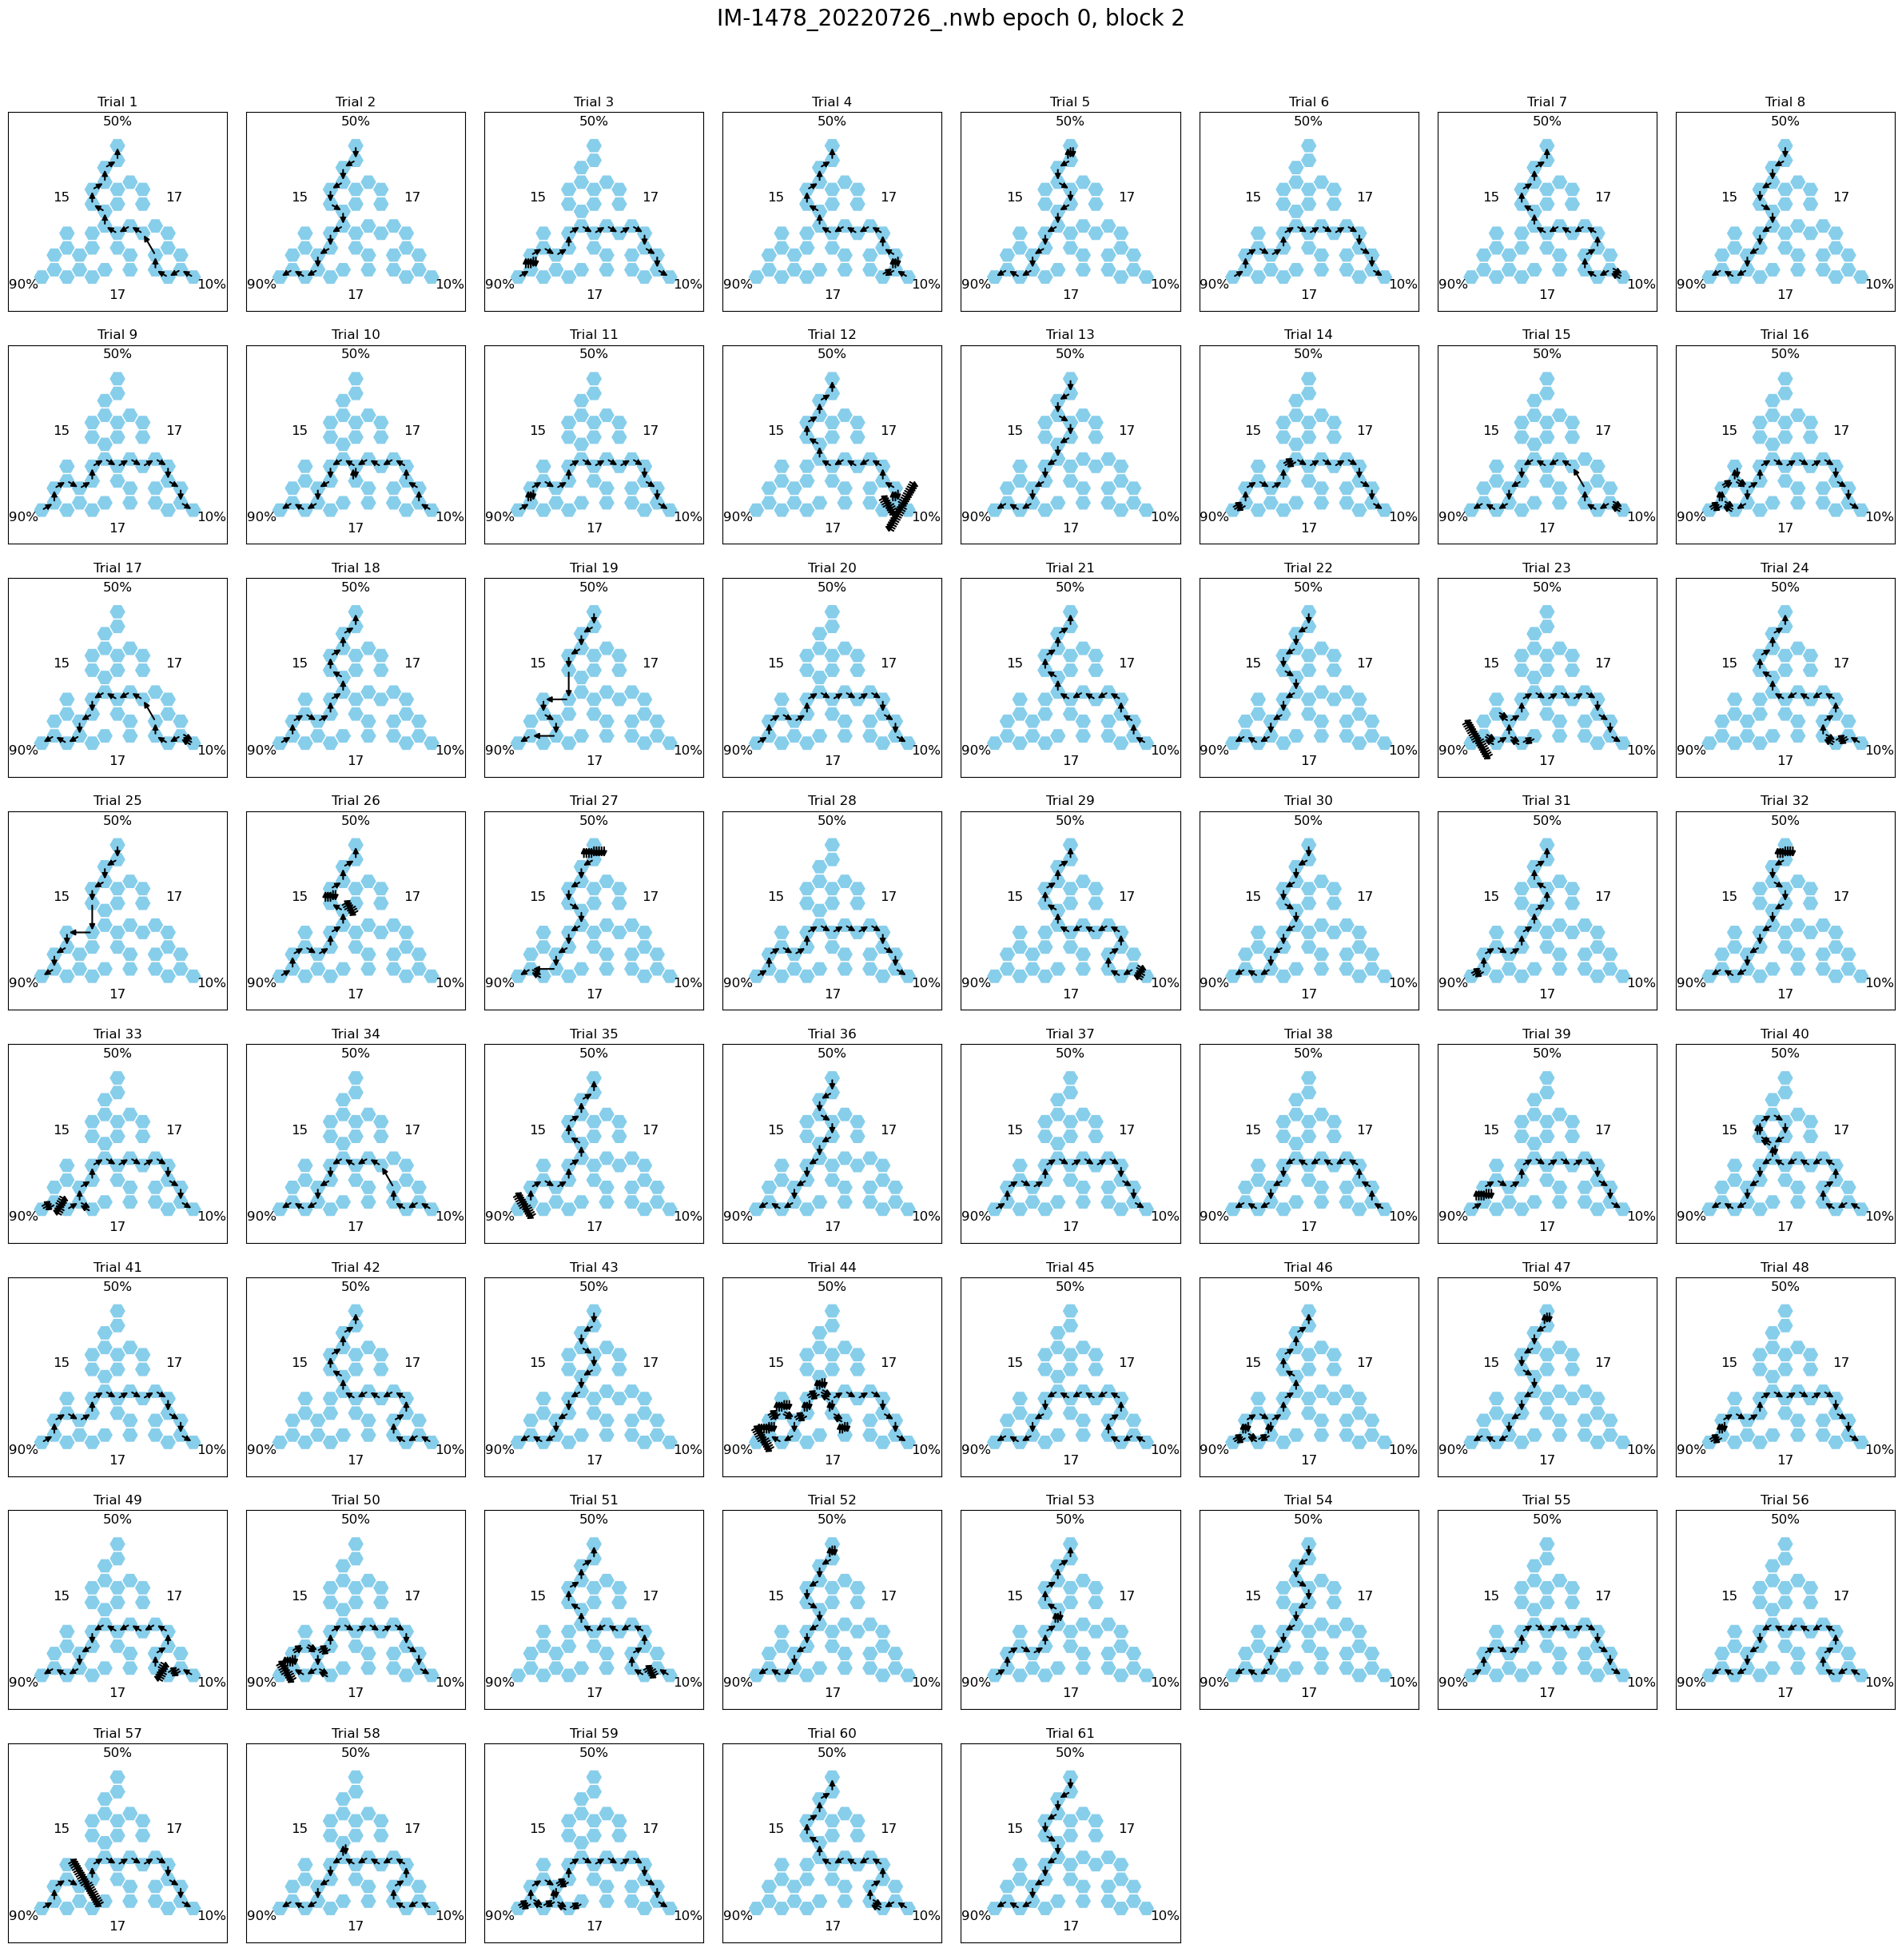

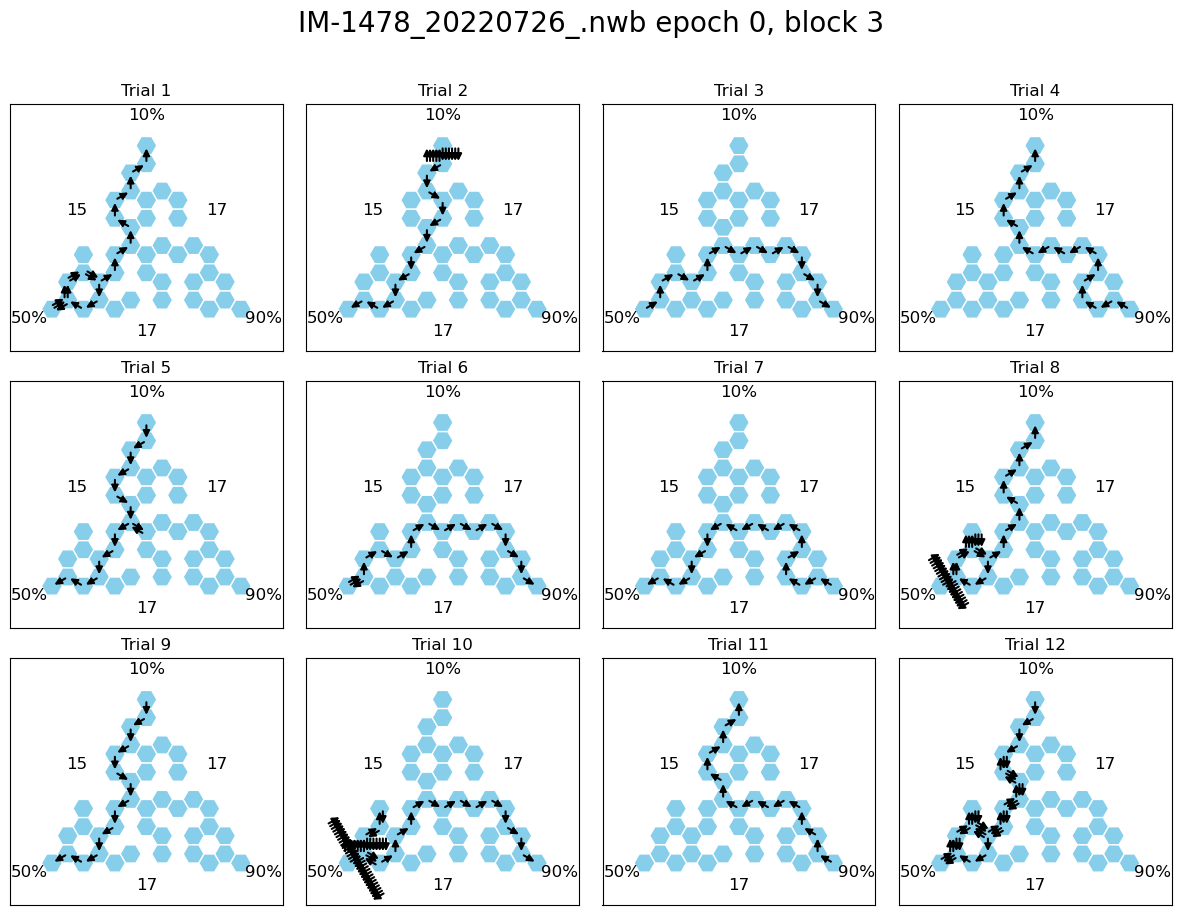

In [10]:
from spyglass_hexmaze.hex_maze_behavior import (
    HexPositionSelection,
    HexPosition,
    HexPath,
    HexMazeBlock,
)

## Step 4 check: Confirm the nwbfile has been added to the hex position tables
key = {"nwb_file_name": nwb_copy_file_name}

# Show the HexPositionSelection table
print("HexPositionSelection table:")
display(HexPositionSelection() & key)

# Show the HexPosition table
print("HexPosition table:")
display((HexPosition()) & key)

# Show the HexPath table
print("HexPath table:")
display(HexPath() & key)

# Plot hex paths for each block
hex_path_key = (HexPath() & key).fetch("KEY")[0]
blocks = (HexMazeBlock() & key).fetch("block")
for block in blocks:
    (HexPath() & hex_path_key).plot_block(block=block)

## 5. Populate photometry tables

In [11]:
## Step 5.
# Insert into all photometry-related tables
# (subject to change, sorry)
populate_all_fiber_photometry(nwb_copy_file_name)

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
[15:04:30][INFO] Spyglass: Populating photometry device tables from IM-1478_20220726_.nwb
[15:04:31][INFO] Spyglass: Inserted excitation sources ['Thorlabs Blue LED', 'Thorlabs Purple LED']
[15:04:31][INFO] Spyglass: Inserted photodetectors ['Doric iFMC7-G2 (7 ports Fluorescence Mini Cube - Three Fluorophores)']
[15:04:31][INFO] Spyglass: Inserted optical fibers ['Doric 0.66mm Flat 40mm Optic Fiber (left NAcc)', 'Doric 0.66mm Flat 40mm Optic Fiber (right NAcc)']
[15:04:31][INFO] Spyglass: In

#### Confirm it worked!

In [12]:
from spyglass_hexmaze.berke_fiber_photometry import (
    ExcitationSource,
    OpticalFiber,
    Photodetector,
    FiberPhotometrySeries,
    Indicator,
    IndicatorInjection,
)

## Step 5 check: Confirm the nwbfile has been added to the photometry tables
key = {"nwb_file_name": nwb_copy_file_name}

print("FiberPhotometrySeries table")
display(FiberPhotometrySeries() & key)

print("OpticalFiber table (not restricted by nwb_file_name, includes all sessions):")
display(OpticalFiber() & key)

print("Photodetector table (not restricted by nwb_file_name, includes all sessions):")
display(Photodetector() & key)

print(
    "ExcitationSource table (not restricted by nwb_file_name, includes all sessions):"
)
display(ExcitationSource() & key)

print("Indicator table (not restricted by nwb_file_name, includes all sessions):")
display(Indicator() & key)

print(
    "IndicatorInjection table (not restricted by nwb_file_name, includes all sessions):"
)
display(IndicatorInjection() & key)

FiberPhotometrySeries table


nwb_file_name name of the NWB file,photometry_series_name name of the FiberPhotometryResponseSeries in the nwbfile,interval_list_name descriptive name of this interval list,description,unit,series_object_id
IM-1478_20220726_.nwb,raw_green,raw_green valid times,"Raw green signal, 470nm",F,eef71e06-08eb-45eb-9564-890c9ad85ee9
IM-1478_20220726_.nwb,raw_reference,raw_reference valid times,"Raw reference signal (isosbestic control), 405nm",F,18f5d8cc-351b-46bc-b03b-c9a6b44835ba
IM-1478_20220726_.nwb,z_scored_green_dFF,z_scored_green_dFF valid times,Z-scored green signal (470 nm) dF/F,dF/F,786d5f31-3041-4304-9552-72947765074d
IM-1478_20220726_.nwb,z_scored_reference_fitted,z_scored_reference_fitted valid times,Fitted Z-scored reference signal. This is the baseline for the dF/F calculation.,F,36ed12bd-bd79-4473-86d2-af781eb2e2d4


OpticalFiber table (not restricted by nwb_file_name, includes all sessions):


optical_fiber_name,manufacturer,model,numerical_aperture,core_diameter_in_um
Doric 0.66mm Flat 40mm Optic Fiber (left NAcc),Doric,MFC_200/250-0.66_40mm_MF2.5_FLT,0.66,200.0
Doric 0.66mm Flat 40mm Optic Fiber (right NAcc),Doric,MFC_200/250-0.66_40mm_MF2.5_FLT,0.66,200.0


Photodetector table (not restricted by nwb_file_name, includes all sessions):


photodetector_name,manufacturer,model,description,detector_type,detected_wavelength_in_nm
Doric iFMC7-G2 (7 ports Fluorescence Mini Cube - Three Fluorophores),Doric,iFMC7-G2,https://neuro.doriclenses.com/products/fmc7?productoption%5BPort%20Configuration%5D=Built-in%20DETECTOR,Silicon photodiode,960.0


ExcitationSource table (not restricted by nwb_file_name, includes all sessions):


excitation_source_name,manufacturer,model,illumination_type,excitation_wavelength_in_nm
Doric Blue LED,Doric,ilFMC7-G2,LED,470.0
Doric Green LED,Doric,ilFMC7-G2,LED,565.0
Doric Purple LED,Doric,ilFMC7-G2,LED,405.0
Thorlabs Blue LED,Thorlabs,M470F3,LED,470.0
Thorlabs Purple LED,Thorlabs,M405FP1,LED,405.0


Indicator table (not restricted by nwb_file_name, includes all sessions):


construct_name,name,description
AAV-DJ-CAG-dLight3.8,dLight3.8,AAV-DJ virus expressing the dopamine sensor dLight3.8 under the CAG promoter. Titer in vg/mL: 2e12. Volume in uL: 1.0.
AAV-hSyn-ACh3.8,gACh4h,"AAV virus expressing the acetylcholine sensor GRAB-ACh3.8 under the hSyn promoter. Unpublished, Yulong Li Lab . Titer in vg/mL: 1.15e13. Volume in uL: 1.0."
AAV9-hsyn-rDA3m,rDA3m,AAV9 virus expressing the red-shifted dopamine sensor GRAB rDA3m under the hSyn promoter. Titer in vg/mL: 5.89e12. Volume in uL: 1.0.
AAVDJ-CAG-dLight1.3b,dLight1.3b,AAV-DJ virus expressing the dopamine sensor dLight1.3b under the CAG promoter. Titer in vg/mL: 2e12. Volume in uL: 1.0.


IndicatorInjection table (not restricted by nwb_file_name, includes all sessions):


construct_name,"injection_coords Rounded coordinates string, e.g. '1.7,1.7,-6.0'",titer_in_vg_per_ml,volume_in_ul,injection_location,"injection_coords_in_mm [AP, ML, DV] in mm"
AAV-DJ-CAG-dLight3.8,"1.7,-1.7,-6.2",2e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,-1.7,-6.2",8e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,1.7,-6.2",2e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,1.7,-6.2",8e12,1,NAcc,=BLOB=
AAV-hSyn-ACh3.8,"1.8,-1.8,-6.2",1,1,NAcc,=BLOB=
AAV-hSyn-ACh3.8,"1.8,1.8,-6.2",1,1,NAcc,=BLOB=
AAV9-hsyn-rDA3m,"1.8,-1.8,-6.2",5,1,NAcc,=BLOB=
AAV9-hsyn-rDA3m,"1.8,1.8,-6.2",5,1,NAcc,=BLOB=
AAVDJ-CAG-dLight1.3b,"1.7,-1.7,-6.2",2e12,1,NAcc,=BLOB=
AAVDJ-CAG-dLight1.3b,"1.7,-1.7,-6.4",2e12,1,NAcc,=BLOB=


# Fast mode: All of the above, but in one cell!

---

In [ ]:
import spyglass.common as sgc
import spyglass.position as sgp
import spyglass.data_import as sgi
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass_hexmaze.hex_maze_behavior import (
    populate_all_hexmaze,
    populate_hex_position,
)
from spyglass_hexmaze.berke_fiber_photometry import populate_all_fiber_photometry

nwb_file_name = "IM-1478_20220726.nwb"

# When we run insert_session, spyglass creates a copy of the nwbfile named file name + _
# We use nwb_copy_file_name to make it explicit which one to use.
# Everything besides sgi.insert_session should use the copy file name
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

## Step 1.
# Insert session into spyglass (populates all common tables)
sgi.insert_sessions(nwb_file_name)

## Step 2.
# Once the session has been inserted, insert into basic hex maze tables
# (populates HexMazeBlock, HexMazeBlock.Trial, HexMazeChoice, HexMazeTrialHistory, HexCentroids, HexMazeConfig tables)
populate_all_hexmaze(nwb_copy_file_name)

## Step 3.
# Process position using default parameters
# We only have one epoch (epoch 0) for Berke lab, so "pos 0 valid times" is always the interval list name
interval_list_name = "pos 0 valid times"

# Our position selection key includes the nwbfile name, the interval to process, and the parameters to use
position_selection_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": interval_list_name,
    "trodes_pos_params_name": "berke_double_led",  # MAY WANT / NEED TO CHANGE THIS!!
}
# To associate a set of parameters with a given interval, insert them into the `TrodesPosSelection` table
# Note "trodes position" really just means any imported unprocessed position
sgp.v1.TrodesPosSelection.insert1(position_selection_key, skip_duplicates=True)

# We can run the pipeline for our chosen interval/parameters by using the `TrodesPosV1.populate`
# Each NWB file, interval, and parameter set is now associated with a new analysis file and object ID.
sgp.v1.TrodesPosV1.populate(position_selection_key)

## Step 4.
# Insert into HexPositionSelection, HexPosition, and HexPath tables
# (must have run populate_all_hexmaze (Step 2) and have an entry in PositionOutput table (Step 3))
populate_hex_position(nwb_copy_file_name)

## Step 5.
# Insert into all photometry-related tables
# (subject to change, sorry)
populate_all_fiber_photometry(nwb_copy_file_name)

#### Confirm all tables are populated!!

wow, so many!

In [13]:
from spyglass_hexmaze.hex_maze_behavior import (
    HexMazeBlock,
    HexMazeChoice,
    HexMazeTrialHistory,
    HexCentroids,
    HexMazeConfig,
    HexPositionSelection,
    HexPosition,
    HexPath,
)
from spyglass_hexmaze.berke_fiber_photometry import (
    ExcitationSource,
    OpticalFiber,
    Photodetector,
    FiberPhotometrySeries,
    Indicator,
    IndicatorInjection,
)
from spyglass.common import IntervalList

key = {"nwb_file_name": nwb_copy_file_name}
# key = 'nwb_file_name LIKE "IM-%"'

print("------------------------- Hex maze tables! ------------------------- \n")

# Show the HexMazeBlock table
print("HexMazeBlock table:")
display(HexMazeBlock() & key)

# Show the Trial part table
print("HexMazeBlock().Trial part table:")
display(HexMazeBlock().Trial() & key)

# Show the HexMazeChoice table
print("HexMazeChoice table:")
display(HexMazeChoice() & key)

# Show the HexMazeTrialHistory table
print("HexMazeTrialHistory table:")
display(HexMazeTrialHistory() & key)

# Show the HexCentroids table (nwb_file_name is key)
print("HexCentroids table:")
display(HexCentroids() & key)

# Show the HexCentroids part table (nwb_file_name and hex)
print("HexCentroidsPart:")
display((HexCentroids().HexCentroidsPart()) & key)

# All config_ids for blocks in your session will also now exist in the HexMazeConfig table
# Show the HexMazeConfig table
print("HexMazeConfig table (not restricted by nwb_file_name, includes all sessions):")
display(HexMazeConfig())

# Show the HexPositionSelection table
print("HexPositionSelection table:")
display(HexPositionSelection() & key)

# Show the HexPosition table
print("HexPosition table:")
display((HexPosition()) & key)

# Show the HexPath table
print("HexPath table:")
display(HexPath() & key)

print("------------------------- Photometry tables! -------------------------\n")

print("FiberPhotometrySeries table")
display(FiberPhotometrySeries() & key)

print("OpticalFiber table (not restricted by nwb_file_name, includes all sessions):")
display(OpticalFiber() & key)

print("Photodetector table (not restricted by nwb_file_name, includes all sessions):")
display(Photodetector() & key)

print(
    "ExcitationSource table (not restricted by nwb_file_name, includes all sessions):"
)
display(ExcitationSource() & key)

print("Indicator table (not restricted by nwb_file_name, includes all sessions):")
display(Indicator() & key)

print(
    "IndicatorInjection table (not restricted by nwb_file_name, includes all sessions):"
)
display(IndicatorInjection() & key)

print(
    "------------------------- Interval Lists for this nwb! ------------------------- \n"
)

print("IntervalList table:")
display(IntervalList() & key)

------------------------- Hex maze tables! ------------------------- 

HexMazeBlock table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,config_id maze configuration as a string,interval_list_name descriptive name of this interval list,p_a probability of reward at port A,p_b probability of reward at port B,p_c probability of reward at port C,num_trials number of trials in this block,task_type 'barrier shift' or 'probabilty shift'
IM-1478_20220726_.nwb,0,1,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change
IM-1478_20220726_.nwb,0,2,"5,15,16,18,22,29,36,44,45",epoch0_block2,50.0,90.0,10.0,61,probability change
IM-1478_20220726_.nwb,0,3,"5,15,16,18,22,29,36,44,45",epoch0_block3,10.0,50.0,90.0,12,probability change


HexMazeBlock().Trial part table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,interval_list_name descriptive name of this interval list,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
IM-1478_20220726_.nwb,0,1,1,epoch0_block1_trial1,1,0,None,B,None,=BLOB=,4.41332
IM-1478_20220726_.nwb,0,1,2,epoch0_block1_trial2,2,0,B,A,None,=BLOB=,19.7859
IM-1478_20220726_.nwb,0,1,3,epoch0_block1_trial3,3,0,A,B,None,=BLOB=,34.3184
IM-1478_20220726_.nwb,0,1,4,epoch0_block1_trial4,4,1,B,C,None,=BLOB=,31.8525
IM-1478_20220726_.nwb,0,1,5,epoch0_block1_trial5,5,0,C,B,None,=BLOB=,24.1405
IM-1478_20220726_.nwb,0,1,6,epoch0_block1_trial6,6,1,B,A,None,=BLOB=,25.1743
IM-1478_20220726_.nwb,0,1,7,epoch0_block1_trial7,7,1,A,C,None,=BLOB=,19.5397
IM-1478_20220726_.nwb,0,1,8,epoch0_block1_trial8,8,1,C,A,None,=BLOB=,18.8619
IM-1478_20220726_.nwb,0,1,9,epoch0_block1_trial9,9,0,A,B,None,=BLOB=,16.3381
IM-1478_20220726_.nwb,0,1,10,epoch0_block1_trial10,10,0,B,C,None,=BLOB=,66.7565


HexMazeChoice table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,choice_direction 'left' or 'right',reward_prob_chosen chosen reward probability,reward_prob_unchosen unchosen reward probability,reward_prob_diff p(chosen) - p(unchosen),path_length_chosen length of the chosen path,path_length_unchosen length of the unchosen path,path_length_diff chosen path length - unchosen path length
IM-1478_20220726_.nwb,0,1,2,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,3,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,4,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,5,left,10.0,90.0,-80.0,17,17,0
IM-1478_20220726_.nwb,0,1,6,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,7,left,50.0,10.0,40.0,17,15,2
IM-1478_20220726_.nwb,0,1,8,right,90.0,10.0,80.0,17,17,0
IM-1478_20220726_.nwb,0,1,9,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,10,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,11,right,90.0,10.0,80.0,17,17,0


HexMazeTrialHistory table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,port_visit_1prev_rwd if the previous visit to this port was rewarded,port_visit_2prev_rwd if the second-to-last visit to this port was rewarded,port_visit_3prev_rwd if the third-to-last visit to this port was rewarded,port_visit_1prev_same_path if the previous visit to this port was via the same path,port_visit_2prev_same_path if the second-to-last visit to this port was via the same path,port_visit_3prev_same_path if the third-to-last visit to this port was via the same path,trial_1prev_rwd if the rat got a reward on the previous trial,trial_2prev_rwd if the rat got a reward 2 trials ago,trial_3prev_rwd if the rat got a reward 3 trials ago,trial_4prev_rwd if the rat got a reward 4 trials ago,trial_5prev_rwd if the rat got a reward 5 trials ago,trials_since_port_visit number of trials since the last visit to this port,trials_since_rwd number of trials since the last reward
IM-1478_20220726_.nwb,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,2,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,3,0,0,0,0,0,0,0,0,0,0,0,2,-1
IM-1478_20220726_.nwb,0,1,4,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,5,0,0,0,0,0,0,1,0,0,0,0,2,1
IM-1478_20220726_.nwb,0,1,6,0,0,0,1,0,0,0,1,0,0,0,4,2
IM-1478_20220726_.nwb,0,1,7,1,0,0,0,0,0,1,0,1,0,0,3,1
IM-1478_20220726_.nwb,0,1,8,1,0,0,0,0,0,1,1,0,1,0,2,1
IM-1478_20220726_.nwb,0,1,9,0,0,0,0,1,0,1,1,1,0,1,4,1
IM-1478_20220726_.nwb,0,1,10,1,1,0,0,1,0,0,1,1,1,0,3,2


HexCentroids table:


nwb_file_name name of the NWB file
IM-1478_20220726_.nwb


HexCentroidsPart:


nwb_file_name name of the NWB file,hex the hex ID in the hex maze (1-49),"x_pixels the x coordinate of the hex centroid, in video pixel coordinates","y_pixels the y coordinate of the hex centroid, in video pixel coordinates","x_cm the x coordinate of the hex centroid, in cm","y_cm the y coordinate of the hex centroid, in cm"
IM-1478_20220726_.nwb,1,327.0,62.0,104.14,19.7452
IM-1478_20220726_.nwb,10,329.0,169.0,104.777,53.8217
IM-1478_20220726_.nwb,11,260.0,170.0,82.8026,54.1401
IM-1478_20220726_.nwb,12,394.0,208.0,125.478,66.242
IM-1478_20220726_.nwb,13,329.0,208.0,104.777,66.242
IM-1478_20220726_.nwb,14,261.0,207.0,83.121,65.9236
IM-1478_20220726_.nwb,15,426.0,233.0,135.669,74.2038
IM-1478_20220726_.nwb,16,360.0,226.0,114.65,71.9745
IM-1478_20220726_.nwb,17,293.0,228.0,93.3121,72.6115
IM-1478_20220726_.nwb,18,215.0,230.0,68.4713,73.2484


HexMazeConfig table (not restricted by nwb_file_name, includes all sessions):


config_id maze configuration as a string,len_ab number of hexes on optimal path between ports A and B,len_bc number of hexes on optimal path between ports B and C,len_ac number of hexes on optimal path between ports A and C,"path_length_diff max path length difference between lenAB, lenBC, lenAC",num_choice_points number of critical choice points for this maze config,num_cycles number of graph cycles (closed loops) for this maze config,choice_points list of hexes that are choice points (not query-able),num_dead_ends number of dead ends at least 3 hexes long,optimal_pct percentage of maze hexes that are on optimal paths,non_optimal_pct percentage of maze hexes that are on non-optimal paths,dead_end_pct percentage of maze hexes that are on dead-end paths
"10,11,14,19,20,26,28,31,38,40",19,15,19,4,1,0,=BLOB=,2,66.67,0.0,33.33
"10,11,14,20,26,28,31,35,38,40",19,23,15,8,1,0,=BLOB=,1,71.79,0.0,28.21
"10,11,14,20,28,31,35,36,38,40",19,23,15,8,1,0,=BLOB=,1,71.79,0.0,28.21
"10,11,15,21,22,25,27,34,37,40,44",19,17,15,4,1,0,=BLOB=,1,65.79,0.0,34.21
"10,11,15,21,25,27,29,34,37,40,44",21,23,15,8,1,0,=BLOB=,0,76.32,0.0,23.68
"10,11,15,22,25,27,30,34,37,40,44",19,21,15,6,1,0,=BLOB=,0,71.05,0.0,28.95
"10,11,19,20,26,28,31,36,38,40",19,21,19,2,1,0,=BLOB=,2,74.36,0.0,25.64
"10,12,15,21,22,27,30,39,44,47",23,17,17,6,3,2,=BLOB=,1,82.05,0.0,17.95
"10,12,15,21,24,27,30,39,44,47",15,17,21,6,3,1,=BLOB=,2,71.79,0.0,28.21
"10,12,15,21,24,27,31,39,44,47",21,17,19,4,3,1,=BLOB=,2,76.92,0.0,23.08


HexPositionSelection table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based)
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0


HexPosition table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_assignment_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_QVH88J6G2L.nwb,6713169f-da4e-412f-93c5-e709fce6ad7f
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0,IM-1478_20220726_HQLDMS4JE5.nwb,28611906-fe95-4be1-8f60-e7d7398f917f


HexPath table:


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_path_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_2A2O0R9ANC.nwb,7cbed8bd-f26a-407d-a42b-08f255c9307a
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0,IM-1478_20220726_SEOYOY3FO3.nwb,543ee677-7d6b-46dc-b63b-b0b9a7c3d365


------------------------- Photometry tables! -------------------------

FiberPhotometrySeries table


nwb_file_name name of the NWB file,photometry_series_name name of the FiberPhotometryResponseSeries in the nwbfile,interval_list_name descriptive name of this interval list,description,unit,series_object_id
IM-1478_20220726_.nwb,raw_green,raw_green valid times,"Raw green signal, 470nm",F,eef71e06-08eb-45eb-9564-890c9ad85ee9
IM-1478_20220726_.nwb,raw_reference,raw_reference valid times,"Raw reference signal (isosbestic control), 405nm",F,18f5d8cc-351b-46bc-b03b-c9a6b44835ba
IM-1478_20220726_.nwb,z_scored_green_dFF,z_scored_green_dFF valid times,Z-scored green signal (470 nm) dF/F,dF/F,786d5f31-3041-4304-9552-72947765074d
IM-1478_20220726_.nwb,z_scored_reference_fitted,z_scored_reference_fitted valid times,Fitted Z-scored reference signal. This is the baseline for the dF/F calculation.,F,36ed12bd-bd79-4473-86d2-af781eb2e2d4


OpticalFiber table (not restricted by nwb_file_name, includes all sessions):


optical_fiber_name,manufacturer,model,numerical_aperture,core_diameter_in_um
Doric 0.66mm Flat 40mm Optic Fiber (left NAcc),Doric,MFC_200/250-0.66_40mm_MF2.5_FLT,0.66,200.0
Doric 0.66mm Flat 40mm Optic Fiber (right NAcc),Doric,MFC_200/250-0.66_40mm_MF2.5_FLT,0.66,200.0


Photodetector table (not restricted by nwb_file_name, includes all sessions):


photodetector_name,manufacturer,model,description,detector_type,detected_wavelength_in_nm
Doric iFMC7-G2 (7 ports Fluorescence Mini Cube - Three Fluorophores),Doric,iFMC7-G2,https://neuro.doriclenses.com/products/fmc7?productoption%5BPort%20Configuration%5D=Built-in%20DETECTOR,Silicon photodiode,960.0


ExcitationSource table (not restricted by nwb_file_name, includes all sessions):


excitation_source_name,manufacturer,model,illumination_type,excitation_wavelength_in_nm
Doric Blue LED,Doric,ilFMC7-G2,LED,470.0
Doric Green LED,Doric,ilFMC7-G2,LED,565.0
Doric Purple LED,Doric,ilFMC7-G2,LED,405.0
Thorlabs Blue LED,Thorlabs,M470F3,LED,470.0
Thorlabs Purple LED,Thorlabs,M405FP1,LED,405.0


Indicator table (not restricted by nwb_file_name, includes all sessions):


construct_name,name,description
AAV-DJ-CAG-dLight3.8,dLight3.8,AAV-DJ virus expressing the dopamine sensor dLight3.8 under the CAG promoter. Titer in vg/mL: 2e12. Volume in uL: 1.0.
AAV-hSyn-ACh3.8,gACh4h,"AAV virus expressing the acetylcholine sensor GRAB-ACh3.8 under the hSyn promoter. Unpublished, Yulong Li Lab . Titer in vg/mL: 1.15e13. Volume in uL: 1.0."
AAV9-hsyn-rDA3m,rDA3m,AAV9 virus expressing the red-shifted dopamine sensor GRAB rDA3m under the hSyn promoter. Titer in vg/mL: 5.89e12. Volume in uL: 1.0.
AAVDJ-CAG-dLight1.3b,dLight1.3b,AAV-DJ virus expressing the dopamine sensor dLight1.3b under the CAG promoter. Titer in vg/mL: 2e12. Volume in uL: 1.0.


IndicatorInjection table (not restricted by nwb_file_name, includes all sessions):


construct_name,"injection_coords Rounded coordinates string, e.g. '1.7,1.7,-6.0'",titer_in_vg_per_ml,volume_in_ul,injection_location,"injection_coords_in_mm [AP, ML, DV] in mm"
AAV-DJ-CAG-dLight3.8,"1.7,-1.7,-6.2",2e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,-1.7,-6.2",8e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,1.7,-6.2",2e12,1,NAcc,=BLOB=
AAV-DJ-CAG-dLight3.8,"1.7,1.7,-6.2",8e12,1,NAcc,=BLOB=
AAV-hSyn-ACh3.8,"1.8,-1.8,-6.2",1,1,NAcc,=BLOB=
AAV-hSyn-ACh3.8,"1.8,1.8,-6.2",1,1,NAcc,=BLOB=
AAV9-hsyn-rDA3m,"1.8,-1.8,-6.2",5,1,NAcc,=BLOB=
AAV9-hsyn-rDA3m,"1.8,1.8,-6.2",5,1,NAcc,=BLOB=
AAVDJ-CAG-dLight1.3b,"1.7,-1.7,-6.2",2e12,1,NAcc,=BLOB=
AAVDJ-CAG-dLight1.3b,"1.7,-1.7,-6.4",2e12,1,NAcc,=BLOB=


------------------------- Interval Lists for this nwb! ------------------------- 

IntervalList table:


nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start/end times for each interval,"pipeline type of interval list (e.g. 'position', 'spikesorting_recording_v1')"
IM-1478_20220726_.nwb,00748c2e-5496-464b-a568-6881ad3dce4b,=BLOB=,spikesorting_artifact_v1
IM-1478_20220726_.nwb,00_r1,=BLOB=,
IM-1478_20220726_.nwb,00_r1 lfp band 103Hz,=BLOB=,lfp band
IM-1478_20220726_.nwb,0262eaeb-75c2-4285-9df2-b980b73da491,=BLOB=,spikesorting_recording_v1
IM-1478_20220726_.nwb,03524c38-9984-4d34-a7cd-f2d709ec56d6,=BLOB=,spikesorting_recording_v1
IM-1478_20220726_.nwb,03f56b0e-879f-4680-8a58-b8d43783c8ba,=BLOB=,spikesorting_artifact_v1
IM-1478_20220726_.nwb,06498a5e-5fc1-4d4c-914c-08ce27948b25,=BLOB=,spikesorting_recording_v1
IM-1478_20220726_.nwb,06ca392c-52ea-4440-acc4-2d8f0e7da063,=BLOB=,spikesorting_artifact_v1
IM-1478_20220726_.nwb,0867803c-2e78-4ac6-b4e2-6b085ca255ed,=BLOB=,spikesorting_recording_v1
IM-1478_20220726_.nwb,0970abac-28bb-4eff-b5db-6e56a35bd938,=BLOB=,spikesorting_recording_v1


# Fetching actual data!
___


## Fetch combined position data (x,y position and hex position)

In [5]:
from spyglass_hexmaze.hex_maze_behavior import HexPosition

# Fetch valid keys for this nwb in HexPosition
keys = (HexPosition() & {"nwb_file_name": nwb_copy_file_name}).fetch("KEY")
print(keys)

# Just use the first one for now for the sake of the example!
key = keys[1]

# Fetch combined hex and position df!
position_and_hex_df = HexPosition().fetch_hex_and_position_dataframe(key)
display(position_and_hex_df)

# We can also fetch like this!
position_and_hex_df = (HexPosition & key).fetch_hex_and_position_dataframe()
display(position_and_hex_df)

[{'pos_merge_id': UUID('cfe6c111-1aa1-a41d-858c-f307e7a53b7c'), 'nwb_file_name': 'IM-1478_20220726_.nwb', 'epoch': 0}, {'pos_merge_id': UUID('d99e7241-3d87-5b76-43e8-ca971ffc9100'), 'nwb_file_name': 'IM-1478_20220726_.nwb', 'epoch': 0}]


,video_frame_ind,position_x,position_y,orientation,velocity_x,velocity_y,speed,hex,hex_including_sides,distance_from_centroid
time,,,,,,,,,,
49.949923,746,48.617221,126.381372,-2.809976,-5.708952,-8.953534,10.618752,49,49,6.093042
50.013767,747,48.520121,126.637676,-3.045622,-3.666710,-3.327045,4.951161,49,49,6.362569
50.093408,748,48.415686,126.169392,-3.021503,-2.065559,1.676796,2.660484,49,49,5.924204
50.159659,749,48.363833,126.881467,-3.025603,-1.153545,4.478238,4.624422,49,49,6.631690
50.221826,750,48.219909,127.309097,-2.971788,-0.854232,4.455999,4.537140,49,49,7.079613
...,...,...,...,...,...,...,...,...,...,...
4373.504764,65600,33.658804,129.751869,2.814165,0.037624,-3.061507,3.061739,2,2,7.088453
4373.568786,65601,33.858620,129.568715,2.892642,0.304144,-2.293145,2.313227,2,2,6.845308
4373.632795,65602,33.897701,129.627685,2.885894,0.632667,-1.712747,1.825861,2,2,6.824070


,video_frame_ind,position_x,position_y,orientation,velocity_x,velocity_y,speed,hex,hex_including_sides,distance_from_centroid
time,,,,,,,,,,
49.949923,746,48.617221,126.381372,-2.809976,-5.708952,-8.953534,10.618752,49,49,6.093042
50.013767,747,48.520121,126.637676,-3.045622,-3.666710,-3.327045,4.951161,49,49,6.362569
50.093408,748,48.415686,126.169392,-3.021503,-2.065559,1.676796,2.660484,49,49,5.924204
50.159659,749,48.363833,126.881467,-3.025603,-1.153545,4.478238,4.624422,49,49,6.631690
50.221826,750,48.219909,127.309097,-2.971788,-0.854232,4.455999,4.537140,49,49,7.079613
...,...,...,...,...,...,...,...,...,...,...
4373.504764,65600,33.658804,129.751869,2.814165,0.037624,-3.061507,3.061739,2,2,7.088453
4373.568786,65601,33.858620,129.568715,2.892642,0.304144,-2.293145,2.313227,2,2,6.845308
4373.632795,65602,33.897701,129.627685,2.885894,0.632667,-1.712747,1.825861,2,2,6.824070


## Fetch photometry timeseries

We can fetch a specific photometry series object by name with `FiberPhotometrySeries.fetch_series` or a dict of all series names and series objects in the nwb with `FiberPhotometrySeries.fetch_all_series`

In [14]:
from spyglass_hexmaze.berke_fiber_photometry import FiberPhotometrySeries

nwb_file_name = "IM-1478_20220726_.nwb"
series_name = "z_scored_green_dFF"

## Fetch a specific photometry series

# Fetch the a specific nwb FiberPhotometryResponseSeries object by name
phot_series = FiberPhotometrySeries.fetch_series(
    nwb_file_name=nwb_file_name, series_name=series_name
)

# The returned phot_series is a FiberPhotometryResponseSeries object
print(
    f"Photometry series object for series name '{series_name}' in nwbfile '{nwb_file_name}':"
)
print(phot_series)

# The photometry data is in test_series.data
print("Photometry series data:")
print(phot_series.data[:])

# The timestamps are in get_timestamps()
print("\nPhotometry series timestamps:")
print(phot_series.get_timestamps())

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


Photometry series object for series name 'z_scored_green_dFF' in nwbfile 'IM-1478_20220726_.nwb':
z_scored_green_dFF abc.FiberPhotometryResponseSeries at 0x140286621065008
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1389155,), type "<f8">
  description: Z-scored green signal (470 nm) dF/F
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 250.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: dF/F

Photometry series data:
[-0.63295973 -0.60080088 -0.57000941 ...  0.11117403  0.24153961
  0.36225635]

Photometry series timestamps:
[0.000000e+00 4.000000e-03 8.000000e-03 ... 5.556608e+03 5.556612e+03
 5.556616e+03]


In [15]:
## Fetch all photometry series in the nwb
phot_series_dict = FiberPhotometrySeries.fetch_all_series(nwb_file_name=nwb_file_name)
print(
    f"The nwbfile {nwb_file_name} contains photometry series: {list(phot_series_dict.keys())}\n"
)

# Print each series name and object
for name, series in phot_series_dict.items():
    print(f"Photometry series name: {name}")
    print(f"Photometry series object: {series}\n")

The nwbfile IM-1478_20220726_.nwb contains photometry series: ['raw_green', 'raw_reference', 'z_scored_green_dFF', 'z_scored_reference_fitted']

Photometry series name: raw_green
Photometry series object: raw_green abc.FiberPhotometryResponseSeries at 0x140286621060688
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1389155,), type "<f8">
  description: Raw green signal, 470nm
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 250.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: F


Photometry series name: raw_reference
Photometry series object: raw_reference abc.FiberPhotometryResponseSeries at 0x140286621065200
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1389155,), type "<f8">
  description: Raw reference signal (isosbestic control), 405nm
  fiber_photometry_table_region: fiber_photometry_tabl

## Extra notes etc

My notes on the process for inserting into PositionOutput. I wrote these a while ago they might be useless idk. Keeping for posterity

In [ ]:
import spyglass.common as sgc
import spyglass.position as sgp
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename

nwb_file_name = "IM-1478_20220719.nwb"

# When we run insert_session, spyglass creates a copy of the nwbfile named file name + _
# We use nwb_copy_file_name to make it explicit which one to use
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

# Look at the session in the raw position table
display(sgc.common_behav.RawPosition() & {"nwb_file_name": nwb_copy_file_name})

# Look at our interval lists
display(sgc.IntervalList & {"nwb_file_name": nwb_copy_file_name})

# We only have one epoch for Berke Lab (epoch 0), so this is always the interval list name
interval_list_name = f"pos 0 valid times"
raw_position_df = (
    sgc.RawPosition()
    & {"nwb_file_name": nwb_copy_file_name, "interval_list_name": interval_list_name}
).fetch1_dataframe()
display(raw_position_df)

# Look at default names of valid position processing params (we will use "default")
display(sgp.v1.TrodesPosParams())

# To associate a set of parameters with a given interval, insert them into the `TrodesPosSelection` table.
trodes_s_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": interval_list_name,
    "trodes_pos_params_name": "berke_double_led",
}
sgp.v1.TrodesPosSelection.insert1(
    trodes_s_key,
    skip_duplicates=True,
)

# We can run the pipeline for our chosen interval/parameters by using the `TrodesPosV1.populate`
# Each NWB file, interval, and parameter set is now associated with a new analysis file and object ID.
sgp.v1.TrodesPosV1.populate(trodes_s_key)